In [15]:
import ast
import json
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

with open('problems2016.txt') as f:
    allProblemsList = json.load(f)


['7B+' '6B+' '7C+' ..., '7A+' '6C' '6B+'] <class 'numpy.ndarray'>


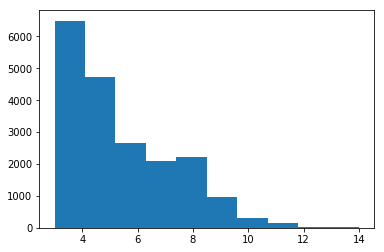

In [33]:
gradeConversion = {"6A":3,"6A+":3,"6B":4,"6B+":4,"6C":5,"6C+":5,
                   "7A":6,"7A+":7,"7B":8,"7B+":8,"7C":9,"7C+":10,"8A":11,"8A+":12,"8B":13,"8B+":14}

allGradesFontList = []
allGradesVScaleList = []
for problem in allProblemsList:
    allGrades.append(problem['setterGrade'])
    allGradesVScaleList.append(gradeConversion[problem['setterGrade']])

allGradesFont = np.array(allGrades)
allGradesVScale = np.array(allGradesVScaleList)

print(allGradesNums,type(allGradesNums))

plt.hist(allGradesVScale,range=(3,14))
plt.show()


x ndim:  2
x shape: (19683, 3)
x size:  59049


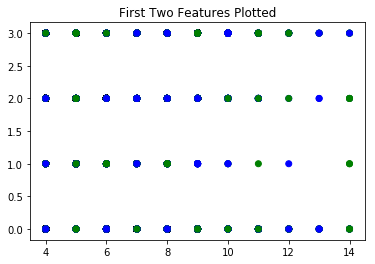

In [51]:
#grade,repeats,rating,
allFeaturesForNow = np.zeros((19683,3))  # Two-dimensional array
allFeaturesForNow.shape = (19683,3)
np.random.seed(0)  # seed for reproducibility

i = 0
for problem in allProblemsList:    
    allFeaturesForNow[i]= np.array([gradeConversion[problem['setterGrade']],problem['repeats'],problem['userRating']])
    i+=1;

#plt.scatter(allFeaturesForNow[:,0], allFeaturesForNow[:,2], color=['b','g'])
plt.title("First Two Features Plotted")
plt.show()

In [92]:
allGradesAndRatings = {}
for i in range(4,15):
    allGradesAndRatings[i] = [0,0,0,0,0]

for feat in allFeaturesForNow:
    allGradesAndRatings[int(feat[0])][int(feat[2])]+=1
    
for feat in allFeaturesForNow:
    allGradesAndRatings[int(feat[0])][4] = (allGradesAndRatings[int(feat[0])][1]+
                                            allGradesAndRatings[int(feat[0])][2]*2 +
                                            allGradesAndRatings[int(feat[0])][3]*3 )/sum(allGradesAndRatings[int(feat[0])])
    
print(allGradesAndRatings)


{4: [1140, 673, 3726, 954, 1.6916892326413313], 5: [963, 279, 2149, 1330, 1.813960928987102], 6: [505, 114, 1168, 875, 1.90509789707084], 7: [553, 75, 647, 807, 1.8187762022699598], 8: [540, 49, 721, 925, 1.907097529759278], 9: [223, 14, 198, 528, 2.0661795452614156], 10: [70, 4, 58, 181, 2.1040667826648134], 11: [62, 1, 20, 58, 1.5086800323405456], 12: [19, 1, 2, 12, 1.16590212458495], 13: [11, 0, 2, 5, 1.0], 14: [10, 2, 4, 5, 1.1297033496130073]}


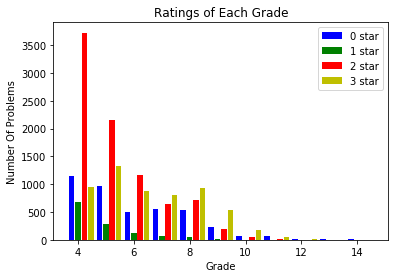

In [93]:
ax = plt.subplot(111)
for i in range(4,15):
    ax.bar(i-.23, allGradesAndRatings[i][0],width=.2,color='b',align='center')
    ax.bar(i, allGradesAndRatings[i][1],width=.2,color='g',align='center')
    ax.bar(i+.23, allGradesAndRatings[i][2],width=.2,color='r',align='center')
    ax.bar(i+.46, allGradesAndRatings[i][3],width=.2,color='y',align='center')

    plt.title("Ratings of Each Grade")
plt.legend(['0 star','1 star','2 star','3 star'])
plt.xlabel("Grade")
plt.ylabel("Number Of Problems")

plt.show()